## Creating Passing Networks, following the [link](https://github.com/darioackermann/passing-networks-in-python/blob/master/demo/Demo%20Eventing.ipynb) in the data&tools section

In [3]:
import socceraction

ModuleNotFoundError: No module named 'socceraction'

In [4]:
from pandas import json_normalize
import json
import pandas as pd

def read(path):
    '''
    Read content of a file
    '''
    with open(path, 'r') as f:
        return f.read()

def read_json(path):
    '''
    Read JSON file from path
    '''
    return json.loads(read(path))

def create_passing_adjacency_matrix(lineup_path:str, event_path:str, team_name:str, verbose:bool=False):
    """
    Using Statsbomb lineups and events, create dataframes for pair and individual passes.

    Parameters
    ----------
    lineup_path: str
        path for lineups
    event_path: str
        path for events
    team_name: str
        team to generate the matrix
    verbose: bool (default = False)
        choose to print the dataframes
    
    Returns
    --------
    player_pass_count: dataframe
        individual passes for all players in the team
    
    pair_pass_count: dataframe
        paired passes for all connections in the team, note that the keys
        are snake case (seperated with _). Example: Koke_Morata
    """

    lineups = read_json(lineup_path)
    names_dict = {player["player_name"]: player["player_nickname"]  
              for team in lineups for player in team["lineup"]}
              
    events = read_json(event_path)
    df_events = json_normalize(events, sep="_")

    df_passes = df_events[(df_events.type_name == "Pass") &
                      (df_events.pass_outcome_name.isna()) &
                      (df_events.team_name == team_name)].copy()
    
    df_passes["pass_recipient_name"] = df_passes.pass_recipient_name.apply(lambda x: names_dict[x] if names_dict[x] else x)
    df_passes["player_name"] = df_passes.player_name.apply(lambda x: names_dict[x] if names_dict[x] else x)

    player_pass_count = df_passes.groupby("player_name").size().to_frame("num_passes")

    df_passes["pair_key"] = df_passes.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
    pair_pass_count = df_passes.groupby("pair_key").size().to_frame("num_passes")

    if(verbose):
        print("===============")
        print(player_pass_count)
        print("===============")
        print(pair_pass_count)
        print("===============")


    return player_pass_count, pair_pass_count

# Example Usage:

lineups_path = "data/3795220_lineup.json"
events_path = "data/3795220_event.json"
team_name = "Spain" #"Italy"

player, pair = create_passing_adjacency_matrix(lineup_path=lineups_path, event_path=events_path, team_name=team_name, verbose=True)

                   num_passes
player_name                  
Aymeric Laporte           132
César Azpilicueta          62
Daniel Olmo                30
Eric García               128
Ferrán Torres              20
Gerard Moreno              17
Jordi Alba                 85
Koke                       52
Marcos Llorente            26
Mikel Oyarzabal            24
Pau Torres                 16
Pedri                      61
Rodri Hernández            43
Sergio Busquets            68
Thiago Alcântara            8
Unai Simón                 51
Álvaro Morata              10
                                   num_passes
pair_key                                     
Aymeric Laporte_César Azpilicueta           2
Aymeric Laporte_Daniel Olmo                10
Aymeric Laporte_Eric García                73
Aymeric Laporte_Ferrán Torres               6
Aymeric Laporte_Gerard Moreno               3
...                                       ...
Pedri_Álvaro Morata                         3
Rodri Hernández_

In [83]:
from pandas.io.json import json_normalize
import json
import pandas as pd
import csv as csv
import argparse
import sys

def read(path):
    '''
    Read content of a file
    '''
    with open(path, 'r') as f:
        return f.read()

def read_json(path):
    '''
    Read JSON file from path
    '''
    return json.loads(read(path))

In [84]:
lineups_path = "data/3795220_lineup.json"
events_path = "data/3795220_event.json"
match_id = 3795220

team_name = "Spain" #"Italy" # 
lineups = read_json(lineups_path)
names_dict = {player["player_name"]: player["player_nickname"]
              for team in lineups for player in team["lineup"]}

names_dict

{'Marco Verratti': None,
 'Emerson Palmieri dos Santos': 'Emerson',
 'Giorgio Chiellini': None,
 'Alex Meret': None,
 'Alessandro Florenzi': None,
 'Bryan Cristante': None,
 'Rafael Tolói': None,
 'Jorge Luiz Frello Filho': 'Jorginho',
 'Gianluigi Donnarumma': None,
 'Lorenzo Insigne': None,
 'Manuel Locatelli': None,
 'Francesco Acerbi': None,
 'Domenico Berardi': None,
 'Federico Chiesa': None,
 'Leonardo Bonucci': None,
 'Salvatore Sirigu': None,
 'Andrea Belotti': None,
 'Alessandro Bastoni': None,
 'Federico Bernardeschi': None,
 'Ciro Immobile': None,
 'Nicolò Barella': None,
 'Giovanni Di Lorenzo': None,
 'Matteo Pessina': None,
 'David de Gea Quintana': 'David de Gea',
 'Álvaro Borja Morata Martín': 'Álvaro Morata',
 'César Azpilicueta Tanco': 'César Azpilicueta',
 'Aymeric Laporte': None,
 'Jorge Resurrección Merodio': 'Koke',
 'Sergio Busquets i Burgos': 'Sergio Busquets',
 'Thiago Alcântara do Nascimento': 'Thiago Alcântara',
 'Jordi Alba Ramos': 'Jordi Alba',
 'José Luis Ga

In [85]:
events = read_json(events_path)
df_events = json_normalize(events, sep="_").assign(match_id=match_id)

df_events.head()

/var/folders/fr/l1t1gbf509z7dm77vpfmjg_00000gn/T/ipykernel_80190/1935097160.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df_events = json_normalize(events, sep="_").assign(match_id=match_id)


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_replacement_id,substitution_replacement_name,clearance_left_foot,dribble_nutmeg,pass_cut_back,pass_goal_assist,shot_aerial_won,injury_stoppage_in_chain,shot_one_on_one,match_id
0,dd8f5655-b496-43ac-9464-7fdcc5654230,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220
1,658c9f5b-fed5-459d-a4e8-c1b4eb137abc,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220
2,7270804f-2035-4965-a6ec-7975a604605e,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220
3,2a9f30d2-9fff-4f0f-88a4-7c7323e753e1,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220
4,5ca9ecb5-21d1-42fd-afef-aa79929facae,5,1,00:00:00.911,0,0,2,1.343146,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220


In [86]:
first_red_card_minute = df_events[df_events.foul_committed_card_name.isin(["Second Yellow", "Red Card"])].minute.min()
first_substitution_minute = df_events[df_events.type_name == "Substitution"].minute.min()
max_minute = df_events.minute.max()

num_minutes = min(first_substitution_minute, first_red_card_minute, max_minute)
num_minutes

61

In [87]:
plot_name = "statsbomb_match{0}_{1}".format(match_id, team_name)

opponent_team = [x for x in df_events.team_name.unique() if x != team_name][0]
plot_title ="{0}'s passing network against {1}".format(team_name, opponent_team)

plot_legend = "Location: pass origin\nSize: number of passes\nColor: number of passes"

In [88]:
def _statsbomb_to_point(location, max_width=120, max_height=80):
    '''
    Convert a point's coordinates from a StatsBomb's range to 0-1 range.
    '''
    return location[0] / max_width, 1-(location[1] / max_height)


In [89]:
df_passes = df_events[(df_events.type_name == "Pass") &
                      (df_events.pass_outcome_name.isna()) &
                      (df_events.team_name == team_name) &
                      (df_events.minute < num_minutes)].copy()

# If available, use player's nickname instead of full name to optimize space in plot
df_passes["pass_recipient_name"] = df_passes.pass_recipient_name.apply(lambda x: names_dict[x] if names_dict[x] else x)
df_passes["player_name"] = df_passes.player_name.apply(lambda x: names_dict[x] if names_dict[x] else x)

df_passes.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_replacement_id,substitution_replacement_name,clearance_left_foot,dribble_nutmeg,pass_cut_back,pass_goal_assist,shot_aerial_won,injury_stoppage_in_chain,shot_one_on_one,match_id
4,5ca9ecb5-21d1-42fd-afef-aa79929facae,5,1,00:00:00.911,0,0,2,1.343146,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220
7,1523f029-3595-4228-9474-848a0f1052b7,8,1,00:00:03.590,0,3,2,2.680299,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220
14,613318e8-0614-4d34-ad20-b1a4325c46e9,15,1,00:00:22.882,0,22,4,2.863385,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220
17,2783a894-1ce0-42e6-a1d2-4e9f31d82eb6,18,1,00:00:28.400,0,28,4,1.563646,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220
20,713c0a17-f371-4935-b9c7-9fc9c0776781,21,1,00:00:33.424,0,33,4,1.099500,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220


In [90]:
df_passes["origin_pos_x"] = df_passes.location.apply(lambda x: _statsbomb_to_point(x)[0])
df_passes["origin_pos_y"] = df_passes.location.apply(lambda x: _statsbomb_to_point(x)[1])
player_position = df_passes.groupby("player_name").agg({"origin_pos_x": "median", "origin_pos_y": "median"})

player_position

,origin_pos_x,origin_pos_y
player_name,,
Aymeric Laporte,0.442500,0.703750
César Azpilicueta,0.530000,0.081250
Daniel Olmo,0.546250,0.503125
Eric García,0.420833,0.341250
Ferrán Torres,0.727083,0.913750
Jordi Alba,0.542083,0.911250
Koke,0.628333,0.365000
Mikel Oyarzabal,0.711667,0.182500
Pedri,0.600417,0.708750


In [91]:
player_pass_count = df_passes.groupby("player_name").size().to_frame("num_passes")
player_pass_value = df_passes.groupby("player_name").size().to_frame("pass_value")

player_pass_count

,num_passes
player_name,
Aymeric Laporte,61
César Azpilicueta,43
Daniel Olmo,18
Eric García,60
Ferrán Torres,20
Jordi Alba,52
Koke,37
Mikel Oyarzabal,21
Pedri,36


In [92]:
df_passes["pair_key"] = df_passes.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
pair_pass_count = df_passes.groupby("pair_key").size().to_frame("num_passes")
pair_pass_value = df_passes.groupby("pair_key").size().to_frame("pass_value")

pair_pass_count.head(10)

,num_passes
pair_key,
Aymeric Laporte_César Azpilicueta,2
Aymeric Laporte_Daniel Olmo,5
Aymeric Laporte_Eric García,30
Aymeric Laporte_Ferrán Torres,6
Aymeric Laporte_Jordi Alba,27
Aymeric Laporte_Koke,8
Aymeric Laporte_Mikel Oyarzabal,2
Aymeric Laporte_Pedri,10
Aymeric Laporte_Sergio Busquets,14


In [93]:
from matplotlib.colors import Normalize
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np


config = read_json("data/plot_config.json")
height = float(config["height"])
width = float(config["width"])


def _point_to_meters(p):
    '''
    Convert a point's coordinates from a 0-1 range to meters.
    '''
    return np.array([p[0]*width, p[1]*height])


def _meters_to_point(p):
    '''
    Convert a point's coordinates from meters to a 0-1 range.
    '''
    return np.array([p[0]/width, p[1]/height])


def _change_range(value, old_range, new_range):
    '''
    Convert a value from one range to another one, maintaining ratio.
    '''
    return ((value-old_range[0]) / (old_range[1]-old_range[0])) * (new_range[1]-new_range[0]) + new_range[0]


def draw_pitch(min_x=0, max_x=1):
    """
    Plot an empty horizontal football pitch, returning Matplotlib's ax object so we can keep adding elements to it.
    Parameters
    -----------
        min_x: float value from 0 to 'max_x' to choose a subsection of the pitch. Default value is 0.
        max_x: float value from 'min_x' to 1 to choose a subsection of the pitch. Default value is 1.
    Returns
    -----------
       ax : Matplotlib's axis object to keetp adding elements on the pitch.
    """
    background_color = config["background_color"]
    lines_color = config["lines_color"]
    fig_size = config["fig_size"]

    # This allows to plot a subsection of the pitch
    ratio = height / float((width * max_x)-(width * min_x))
    f, ax = plt.subplots(1, 1, figsize=(fig_size, fig_size*ratio), dpi=100)

    ax.set_ylim([0, height])
    ax.set_xlim([width*min_x, width*max_x])
    ax.add_patch(patches.Rectangle((0, 0), width, height, color=background_color))

    # Plot outer lines
    line_pts = [
        [_point_to_meters([0, 0]), _point_to_meters([0, 1])],  # left line
        [_point_to_meters([1, 0]), _point_to_meters([1, 1])],  # right line
        [_point_to_meters([0, 1]), _point_to_meters([1, 1])],  # top line
        [_point_to_meters([0, 0]), _point_to_meters([1, 0])],  # bottom line
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
                alpha=0.8, lw=1.5, zorder=3, color=lines_color)

    # Plot boxes
    line_pts = [
        [_point_to_meters([0.5, 0]), _point_to_meters([0.5, 1])],  # center line

        # left box
        [[0, 24.85], [0, 2.85]],
        [[0, 13.85], [16.5, 13.85]],
        [[0, 54.15], [16.5, 54.15]],
        [[16.5, 13.85], [16.5, 54.15]],

        # left goal
        [[0, 24.85], [5.5, 24.85]],
        [[0, 43.15], [5.5, 43.15]],
        [[5.5, 24.85], [5.5, 43.15]],

        # right box
        [[105, 24.85], [105, 2.85]],
        [[105, 13.85], [88.5, 13.85]],
        [[105, 54.15], [88.5, 54.15]],
        [[88.5, 13.85], [88.5, 54.15]],

        # right goal
        [[105, 24.85], [99.5, 24.85]],
        [[105, 43.15], [99.5, 43.15]],
        [[99.5, 24.85], [99.5, 43.14]]
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
                alpha=0.8, lw=1.5, zorder=3, color=lines_color)

    # Plot circles
    ax.add_patch(patches.Wedge((94.0, 34.0), 9, 130, 230, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02, alpha=0.8))

    ax.add_patch(patches.Wedge((11.0, 34.0), 9, 310, 50, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02, alpha=0.8))

    ax.add_patch(patches.Wedge((52.5, 34), 9.5, 0, 360, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02, alpha=0.8))

    plt.axis('off')
    return ax


def draw_pass_map(ax, player_position,
                  player_pass_count, player_pass_value, pair_pass_count, pair_pass_value, title="", legend="",
                  max_player_count=None, max_player_value=None, max_pair_count=None, max_pair_value=None):
    """
    Plot a passing network.
    Parameters
    -----------
        ax: Matplotlib's axis object, it expects to have the pitch already plotted.
        player_position: pandas DataFrame with player names as index and columns 'origin_pos_x' and 'origin_pos_y' in 0-1 range.
        player_pass_count: pandas DataFrame with player names as index and a column 'num_passes'.
        player_pass_value: pandas DataFrame with player names as index and a column 'pass_value'.
        pair_pass_count: pandas DataFrame with 'player1_player2' as index and a column 'num_passes'.
        pair_pass_value: pandas DataFrame with 'player1_player2' as index and a column 'pass_value'.
        title: text that will be shown above the pitch.
        legend: text that will be shown in the bottom-left corner of the pitch.
        max_player_count: max number of passes per player. If not specified, it uses the player_pass_count.num_passes.max()
        max_player_value: max pass value per player. If not specified, it uses the player_pass_value.pass_value.max()
        max_pair_count: max number of passes per player pair. If not specified, it uses the pair_pass_count.num_passes.max()
        max_pair_value: max pass value per player pair. If not specified, it uses the pair_pass_value.pass_value.max()
    Returns
    -----------
       ax : Matplotlib's axis object to keep adding elements on the pitch.
    """
    background_color = config["background_color"]

    player_position["origin_pos_y"] = player_position["origin_pos_y"]*height
    player_position["origin_pos_x"] = player_position["origin_pos_x"]*width

    # This allows to fix the range of sizes and color scales so that two plots from different teams are comparable.
    max_player_count = player_pass_count.num_passes.max() if max_player_count is None else max_player_count
    max_player_value = player_pass_value.pass_value.max() if max_player_value is None else max_player_value
    max_pair_count = pair_pass_count.num_passes.max() if max_pair_count is None else max_pair_count
    max_pair_value = pair_pass_value.pass_value.max() if max_pair_value is None else max_pair_value

    # Step 1: plot edges
    if config["plot_edges"]:
        # Combine num_passes and pass_value columns into one DataFrame
        pair_stats = pd.merge(pair_pass_count, pair_pass_value, left_index=True, right_index=True)
        for pair_key, row in pair_stats.iterrows():
            player1, player2 = pair_key.split("_")

            player1_x = player_position.loc[player1]["origin_pos_x"]
            player1_y = player_position.loc[player1]["origin_pos_y"]

            player2_x = player_position.loc[player2]["origin_pos_x"]
            player2_y = player_position.loc[player2]["origin_pos_y"]

            num_passes = row["num_passes"]
            pass_value = row["pass_value"]

            line_width = _change_range(num_passes, (0, max_pair_count), (config["min_edge_width"], config["max_edge_width"]))
            norm = Normalize(vmin=0, vmax=max_pair_value)
            edge_cmap = cm.get_cmap(config["nodes_cmap"])
            edge_color = edge_cmap(norm(pass_value))

            ax.plot([player1_x, player2_x], [player1_y, player2_y],
                    'w-', linestyle='-', alpha=1, lw=line_width, zorder=3, color=edge_color)

    # Step 2: plot nodes
    # Combine num_passes and pass_value columns into one DataFrame
    player_stats = pd.merge(player_pass_count, player_pass_value, left_index=True, right_index=True)
    for player_name, row in player_stats.iterrows():
        player_x = player_position.loc[player_name]["origin_pos_x"]
        player_y = player_position.loc[player_name]["origin_pos_y"]

        num_passes = row["num_passes"]
        pass_value = row["pass_value"]

        marker_size = _change_range(num_passes, (0, max_player_count), (config["min_node_size"], config["max_node_size"]))
        norm = Normalize(vmin=0, vmax=max_player_value)
        node_cmap = cm.get_cmap(config["nodes_cmap"])
        node_color = node_cmap(norm(pass_value))

        ax.plot(player_x, player_y, '.', color=node_color, markersize=marker_size, zorder=5)
        ax.plot(player_x, player_y, '.', color=background_color, markersize=marker_size-20, zorder=6)
        ax.annotate(player_name, xy=(player_x, player_y), ha="center", va="center", zorder=7,
                    fontsize=config["font_size"], color=config["font_color"], weight='bold',
                    path_effects=[pe.withStroke(linewidth=2, foreground=background_color)])

    if legend:
        ax.annotate(legend, xy=(0.01*width, 0.02*height),
                    ha="left", va="bottom", zorder=7, fontsize=10, color=config["lines_color"])

    if title:
        ax.set_title(title, loc="left")

    return ax

/var/folders/fr/l1t1gbf509z7dm77vpfmjg_00000gn/T/ipykernel_80190/1841062157.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
/var/folders/fr/l1t1gbf509z7dm77vpfmjg_00000gn/T/ipykernel_80190/1841062157.py:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
/var/folders/fr/l1t1gbf509z7dm77vpfmjg_00000gn/T/ipykernel_80190/1841062157.py:171: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "w-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([player1_x, player2_x], [player1_y, player2_y],
/var/folders/fr/l1t1gbf509z7dm77vpfmjg_00000gn/T/

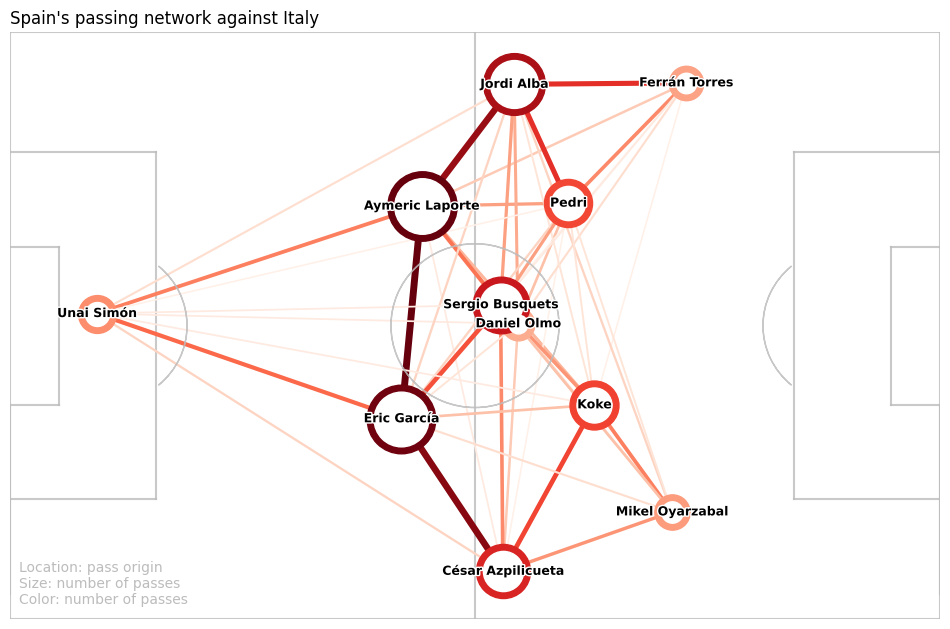

In [94]:
import matplotlib.pyplot as plt

ax = draw_pitch()
ax = draw_pass_map(ax, player_position, player_pass_count, player_pass_value,
              pair_pass_count, pair_pass_value, plot_title, plot_legend)

plt.savefig("plots/{i}/passing_network/{i}.png".format(i=team_name.lower()), bbox_inches="tight")